In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [97]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') 
pd.options.mode.chained_assignment = None #ignore common pandas warnings

In [98]:
df = pd.read_csv('Regression Problem\sales.csv')

In [99]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,0,2023-11-24,0,34,0,3,50,150
1,1,1,2023-02-27,1,26,1,2,500,1000
2,2,2,2023-01-13,0,50,2,1,30,30
3,3,3,2023-05-21,0,37,1,1,500,500
4,4,4,2023-05-06,0,30,0,2,50,100


In [100]:
df.shape

(1000, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Date              1000 non-null   object
 3   Gender            1000 non-null   int64 
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   int64 
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [102]:
print(df.isnull().sum())

Unnamed: 0.1        0
Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [103]:
duplicate_rows = df.duplicated().sum()

In [104]:
duplicate_rows

np.int64(0)

In [105]:
df['Date'].dtype

dtype('O')

In [106]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [107]:
type(df['Date'])

pandas.core.series.Series

In [108]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,0,0,2023-11-24,0,34,0,3,50,150,11
1,1,1,2023-02-27,1,26,1,2,500,1000,2
2,2,2,2023-01-13,0,50,2,1,30,30,1
3,3,3,2023-05-21,0,37,1,1,500,500,5
4,4,4,2023-05-06,0,30,0,2,50,100,5


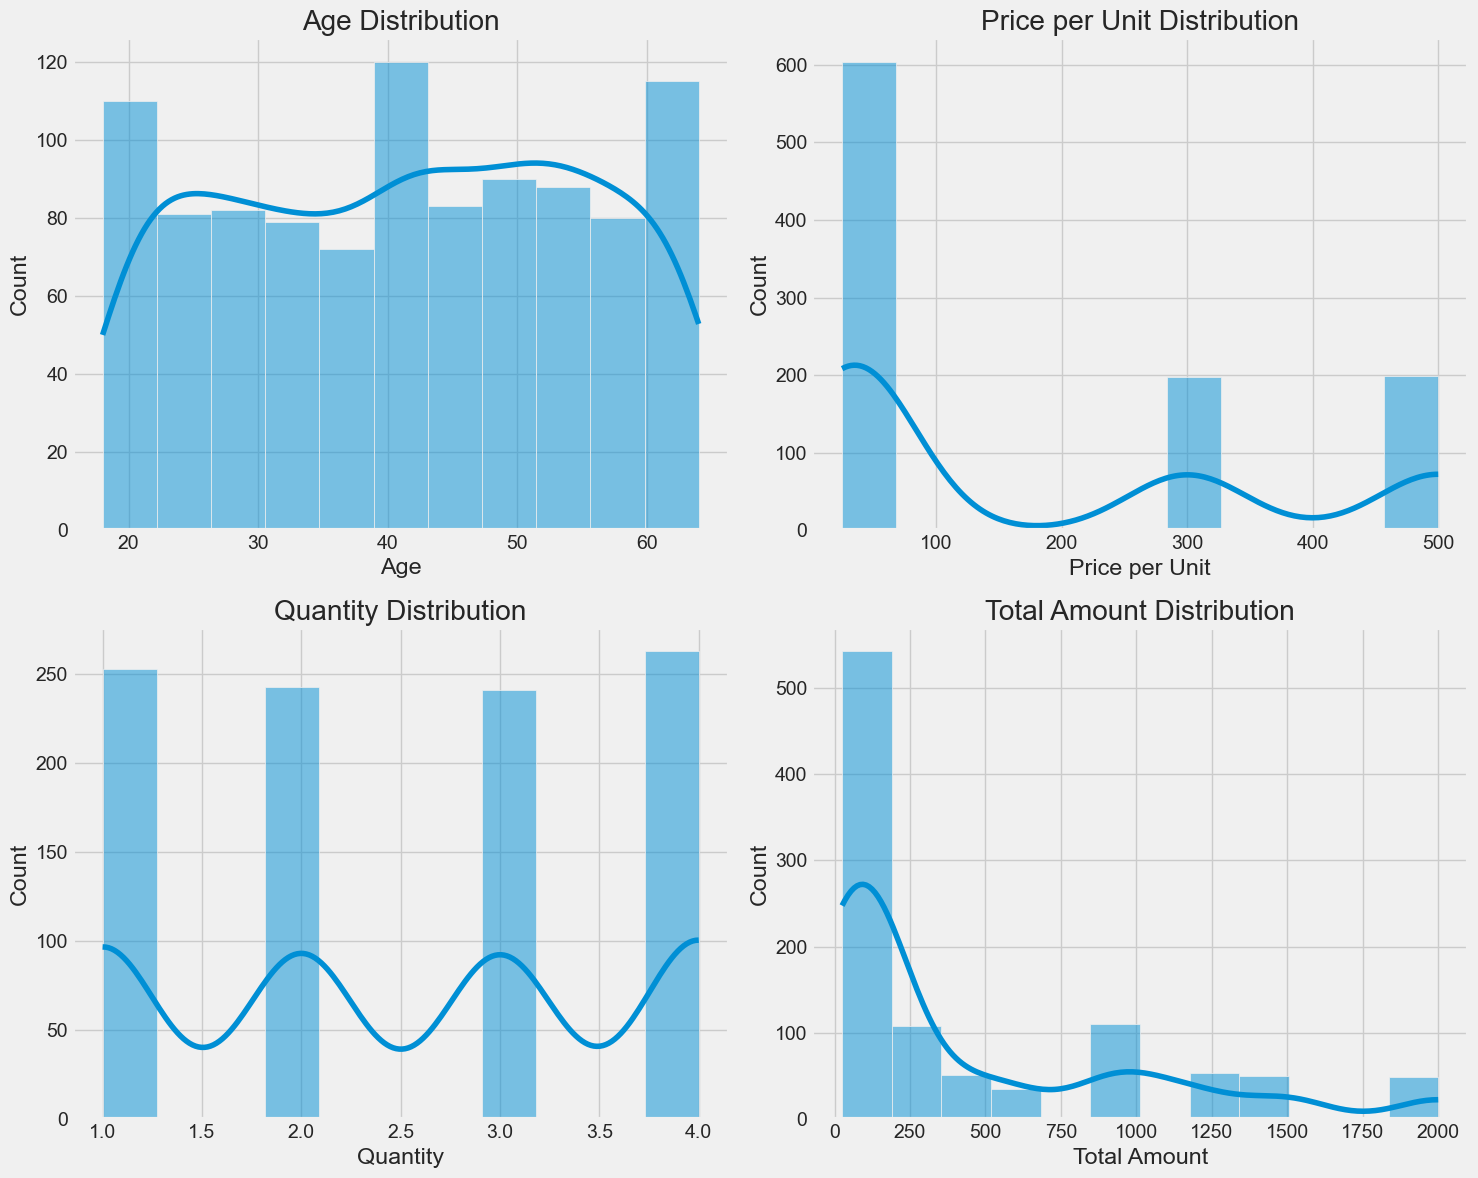

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df['Price per Unit'], kde=True, ax=axes[0, 1]).set_title('Price per Unit Distribution')
sns.histplot(df['Quantity'], kde=True, ax=axes[1, 0]).set_title('Quantity Distribution')
sns.histplot(df['Total Amount'], kde=True, ax=axes[1, 1]).set_title('Total Amount Distribution')
plt.tight_layout()
plt.show()

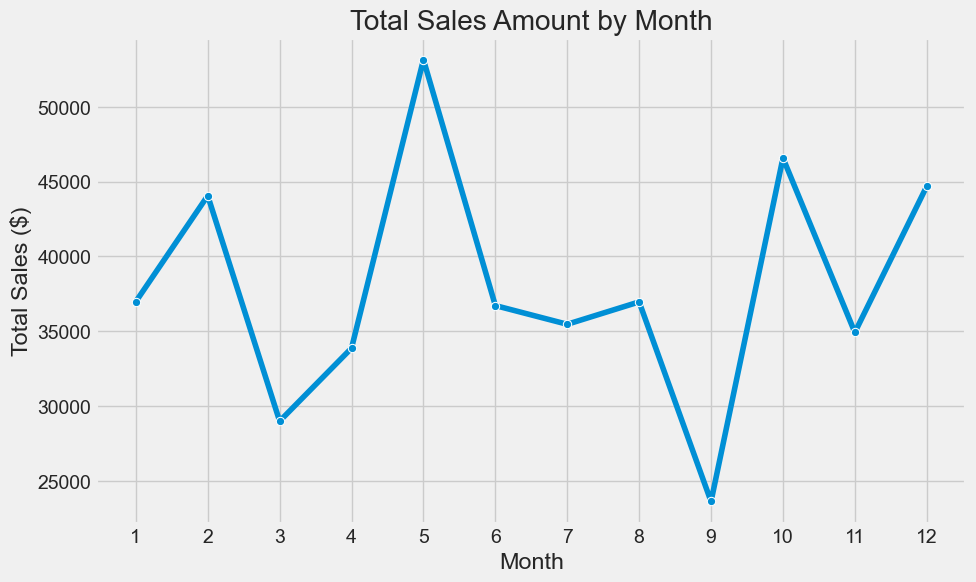

In [110]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Total Sales Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.show()


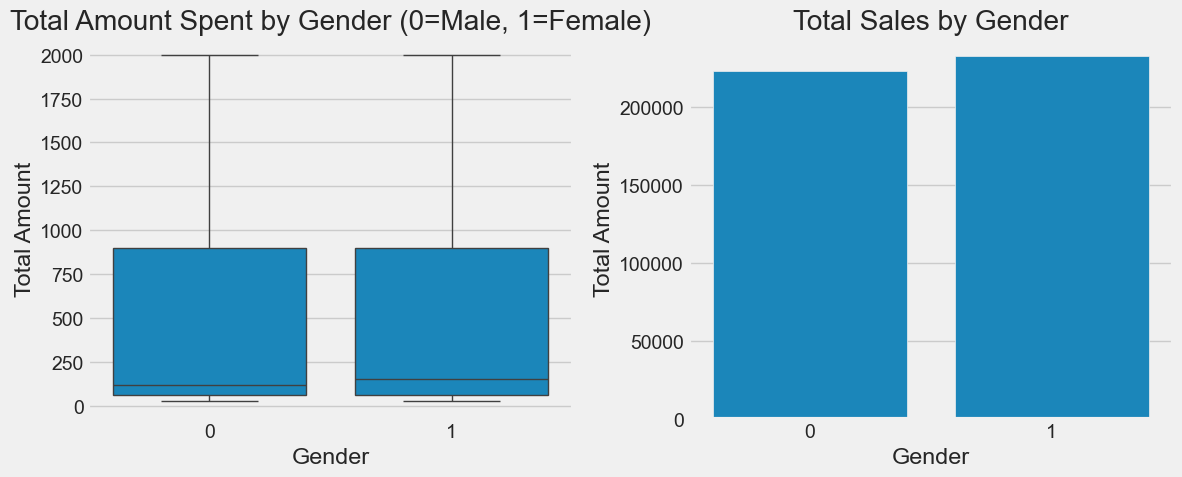

In [111]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title('Total Amount Spent by Gender (0=Male, 1=Female)')
plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Gender')
plt.tight_layout()
plt.show()

In [112]:
X = df.drop(['Date', 'Total Amount'], axis=1)
y = df['Total Amount']

In [113]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Month']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [114]:
X.head()

,Unnamed: 0.1,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Month
0,0,0,0,-0.540565,0,0.429265,-0.685123,1.289760
1,1,1,1,-1.125592,1,-0.453996,1.688464,-1.318158
2,2,2,0,0.629489,2,-1.337258,-0.790615,-1.607926
3,3,3,0,-0.321180,1,-1.337258,1.688464,-0.448852
4,4,4,0,-0.833078,0,-0.453996,-0.685123,-0.448852


In [115]:
X.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_test.shape[0]

200

In [118]:
X_train.shape[0]

800

In [119]:
linear = LinearRegression()

In [120]:
linear.fit(X_train,y_train)

LinearRegression()

In [121]:
y_test_pred = linear.predict(X_test)
y_train_pred = linear.predict(X_train)

In [122]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Train R² Score: 0.8547
Test R² Score: 0.8563
Mean Absolute Error (MAE): 173.49
Mean Squared Error (MSE): 42061.18


In [123]:
lasso = Lasso()
lasso.fit(X_train,y_train)

y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

train_r2 = r2_score(y_train, y_train_pred_lasso)
test_r2 = r2_score(y_test, y_test_pred_lasso)
mae = mean_absolute_error(y_test, y_test_pred_lasso)
mse = mean_squared_error(y_test, y_test_pred_lasso)
rmse = np.sqrt(mse)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Train R² Score: 0.8547
Test R² Score: 0.8565
Mean Absolute Error (MAE): 173.35
Mean Squared Error (MSE): 42006.45


In [124]:
ridge = Ridge()
ridge.fit(X_train,y_train)

y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

train_r2 = r2_score(y_train, y_train_pred_ridge)
test_r2 = r2_score(y_test, y_test_pred_ridge)
mae = mean_absolute_error(y_test, y_test_pred_ridge)
mse = mean_squared_error(y_test, y_test_pred_ridge)
rmse = np.sqrt(mse)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Train R² Score: 0.8547
Test R² Score: 0.8563
Mean Absolute Error (MAE): 173.48
Mean Squared Error (MSE): 42064.22
